I dati elaborati, fanno riferimento ai clienti che hanno fatto acquisti in un centro commerciale. L'obiettivo del lavoro è suddividere i clienti in cluster tramite tecniche differenti ed osservare quale di esse restituisca il risultato migliore.

In [1]:
import pandas as pd
import numpy as np
from numpy import unique
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer,intercluster_distance
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift, estimate_bandwidth
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import pairwise_distances
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

# Import del Dataset

In [3]:
df=pd.read_csv("/content/Mall_Customers.csv")

In [4]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
df.describe(include="all")

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Grafici per Visualizzazione

<Figure size 800x550 with 0 Axes>

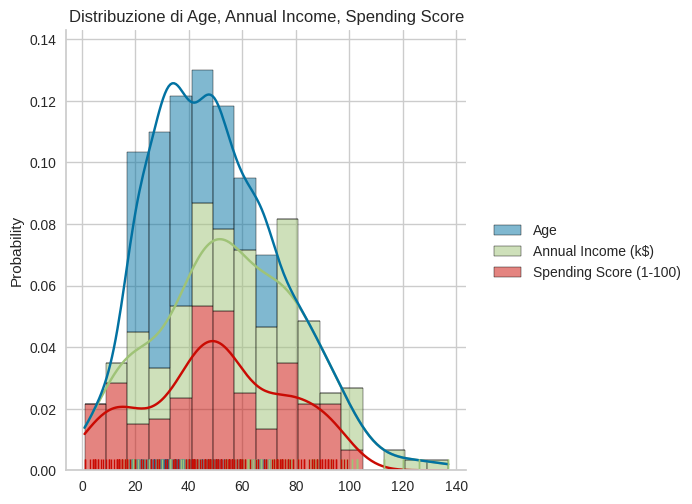

In [8]:
plt.figure()
sns.displot(data=df[[ "Age", "Annual Income (k$)",
       "Spending Score (1-100)"]],multiple="stack",kde=True,rug=True,stat="probability")
plt.title("Distribuzione di Age, Annual Income, Spending Score")
plt.show()

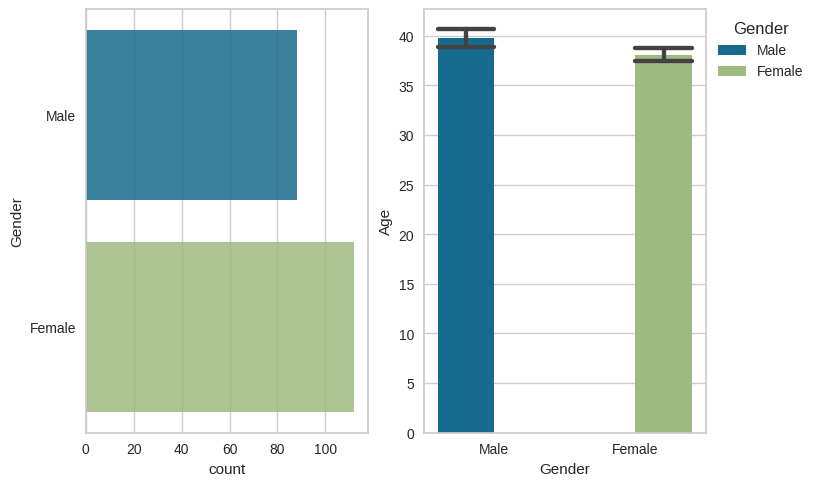

In [9]:
fig,axes = plt.subplots(1, 2)
sns.countplot(y=df["Gender"],alpha=0.85,ax=axes[0])
sns.barplot(data=df,y="Age",x="Gender",hue="Gender",capsize=0.4,errorbar=("ci",40),ax=axes[1])
sns.move_legend(axes[1], "upper left",bbox_to_anchor=(1, 1))
plt.show()

<Figure size 800x550 with 0 Axes>

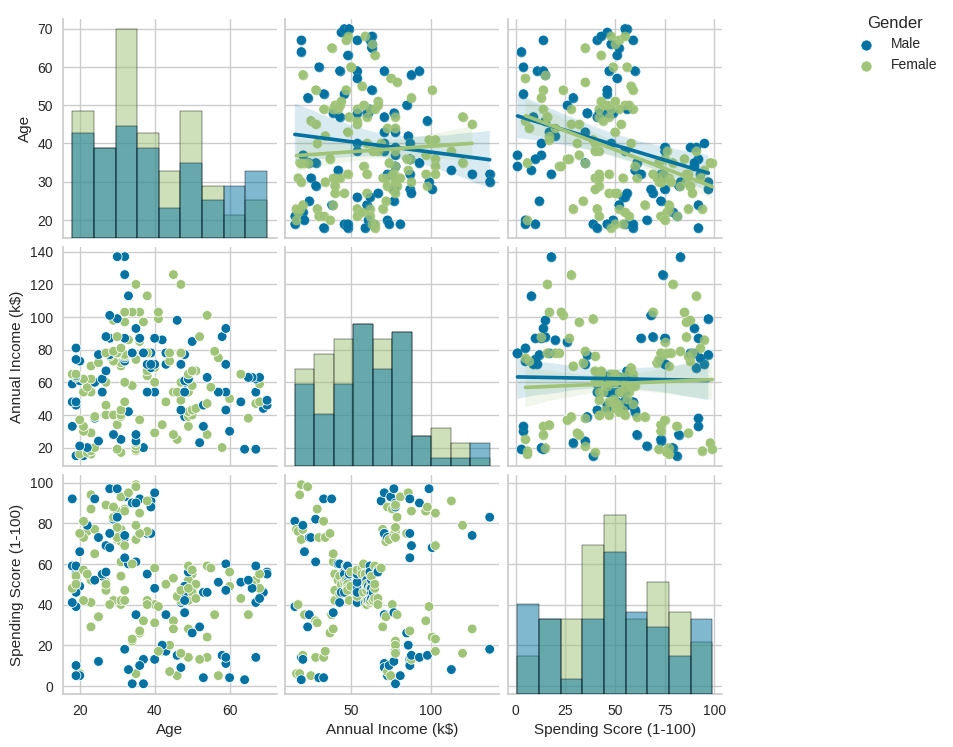

In [10]:
plt.figure()
ax=sns.pairplot(data=df,vars=["Age","Annual Income (k$)","Spending Score (1-100)"],hue="Gender",
             diag_kind="hist",kind="scatter")
ax.map_upper(sns.regplot)
sns.move_legend(ax, "upper left",bbox_to_anchor=(1, 1))
plt.show()

<Axes: >

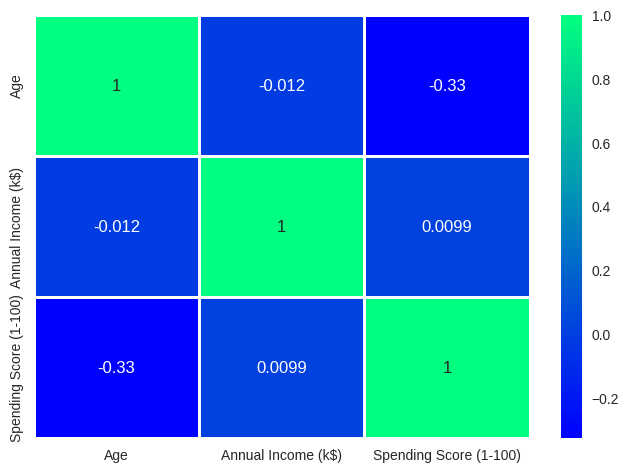

In [11]:
plt.figure()
df1=df[["Age","Annual Income (k$)","Spending Score (1-100)"]]
sns.heatmap(df1.corr(), annot=True,linewidth=.8, cmap=plt.cm.winter)

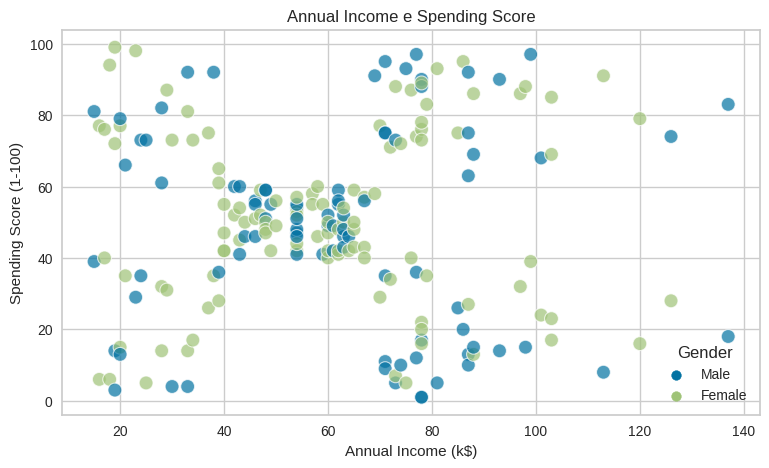

In [12]:
plt.figure(figsize=(9,5))
sns.scatterplot(df,x="Annual Income (k$)",y="Spending Score (1-100)",hue="Gender",s=100,alpha=0.7)
plt.title("Annual Income e Spending Score")
plt.show()

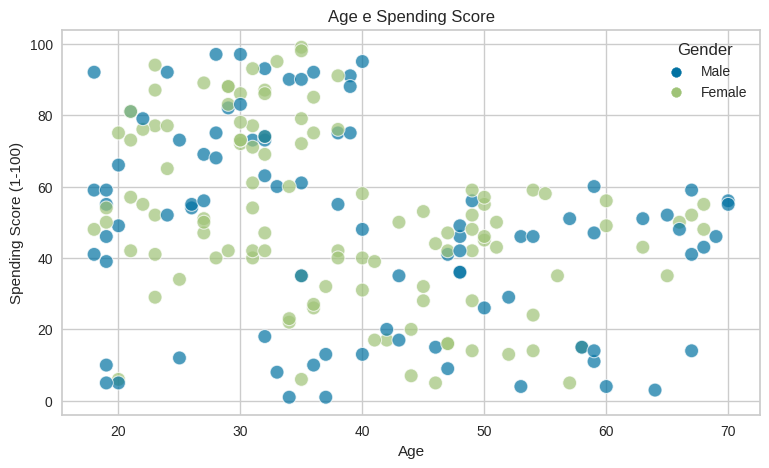

In [13]:
plt.figure(figsize=(9,5))
sns.scatterplot(df,x="Age",y="Spending Score (1-100)",hue="Gender",s=100,alpha=0.7)
plt.title("Age e Spending Score")
plt.show()

# KMeans

In [14]:
X1=df[["Age","Annual Income (k$)","Spending Score (1-100)"]]

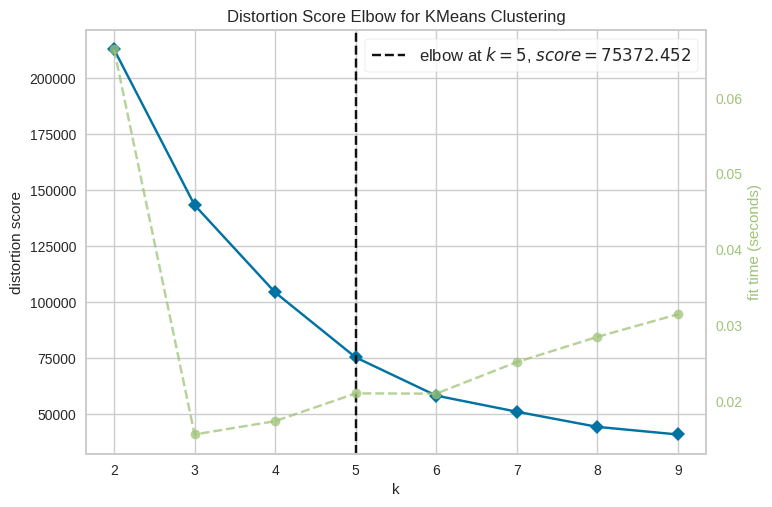

In [15]:
visualizer = KElbowVisualizer(KMeans(),k=(2,10))
visualizer.fit(X1)
visualizer.poof()
plt.show()

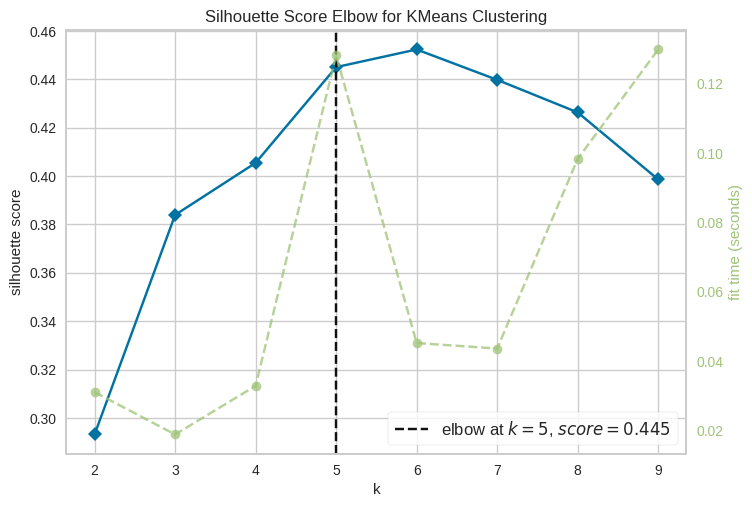

In [16]:
visualizer = KElbowVisualizer(KMeans(random_state=23),k=(2,10),metric="silhouette")
visualizer.fit(X1)
visualizer.show()
plt.show()

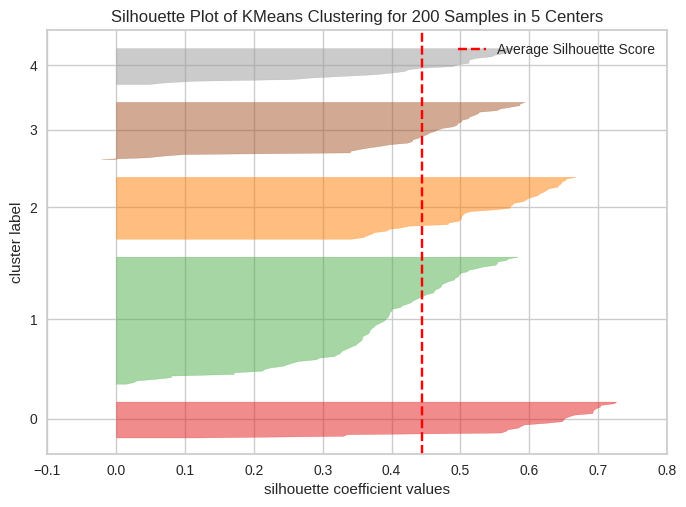

In [17]:
sil_visualizer = SilhouetteVisualizer(KMeans(5))
sil_visualizer.fit(X1)
sil_visualizer.show()
plt.show()

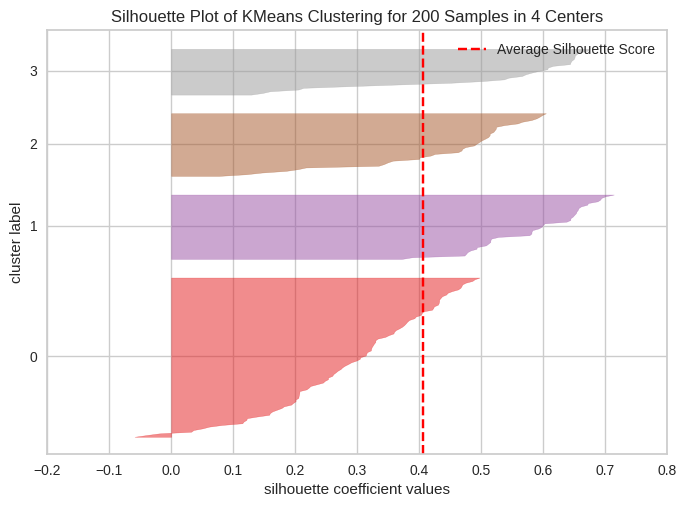

In [18]:
sil_visualizer = SilhouetteVisualizer(KMeans(4))
sil_visualizer.fit(X1)
sil_visualizer.show()
plt.show()

Il valore K ottimale da scegliere è 5, corrispondente al numero ottimale di gruppi in cui dividere i clientei.

In [19]:
k=5
K_means=KMeans(init="k-means++",n_clusters=k)
K_means.fit(X1)

KMeans(n_clusters=5)

In [20]:
df["KM_Cluster"]=K_means.labels_
KM_centres=K_means.cluster_centers_

### Considero la variabile "Annual Income"

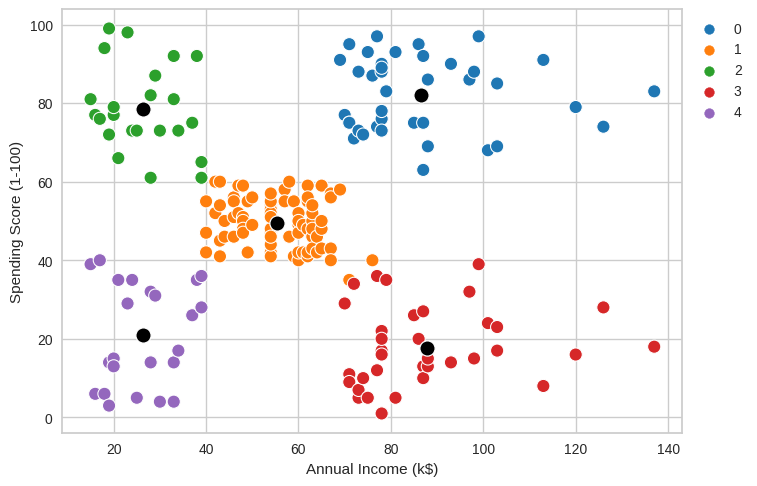

In [21]:
plt.figure()
ax=sns.scatterplot(data=df,x="Annual Income (k$)", y="Spending Score (1-100)",hue="KM_Cluster",palette="tab10",s=90) #tab10 per riconoscere meglio i gruppi
ax=sns.scatterplot(x=KM_centres[:,1],y=KM_centres[:,2],s=120,color='black')
sns.move_legend(ax, "upper left",bbox_to_anchor=(1, 1))
plt.show()

### Considero la variabile "Age"

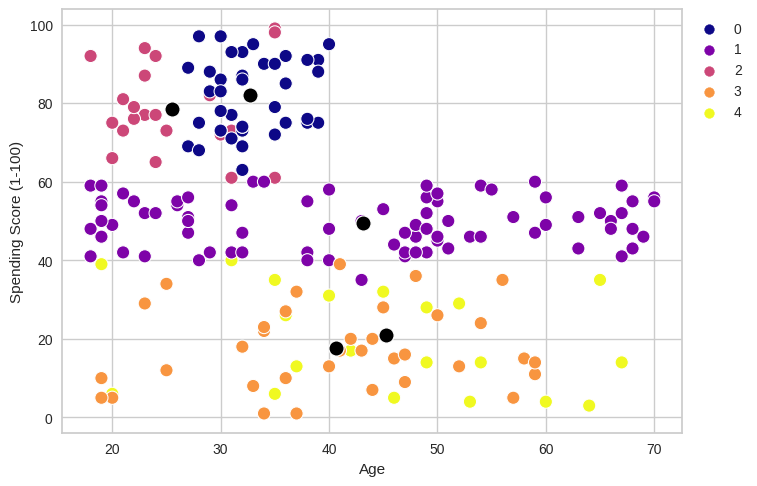

In [22]:
plt.figure()
ax=sns.scatterplot(data=df,x="Age", y="Spending Score (1-100)",hue="KM_Cluster",palette="plasma",s=90)
ax=sns.scatterplot(x=KM_centres[:,0],y=KM_centres[:,2],s=120,color="black")
sns.move_legend(ax, "upper left",bbox_to_anchor=(1, 1))
plt.show()

Da questo momento in poi possiamo scartare la variabile "Age" dall'analisi.

# Clustering Gerarchico

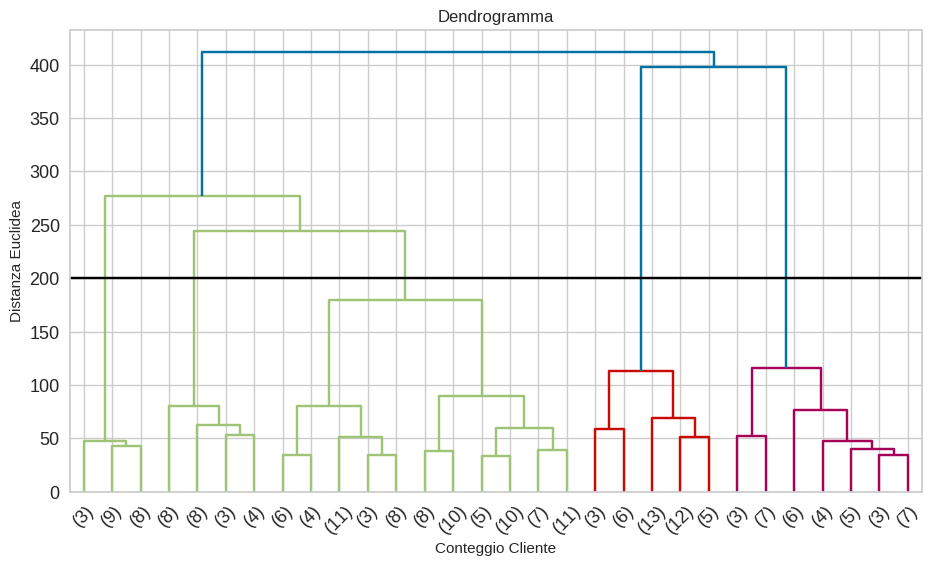

In [23]:
plt.figure(figsize=(11, 6))
dendo = dendrogram(linkage(X1, method="ward"),truncate_mode = "lastp")
plt.axhline(y=200 , color='black')
plt.title("Dendrogramma")
plt.xlabel("Conteggio Cliente")
plt.ylabel("Distanza Euclidea")
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.show()

In [24]:
agc = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
agc.fit(X1)
df["HC_Cluster"]=agc.labels_

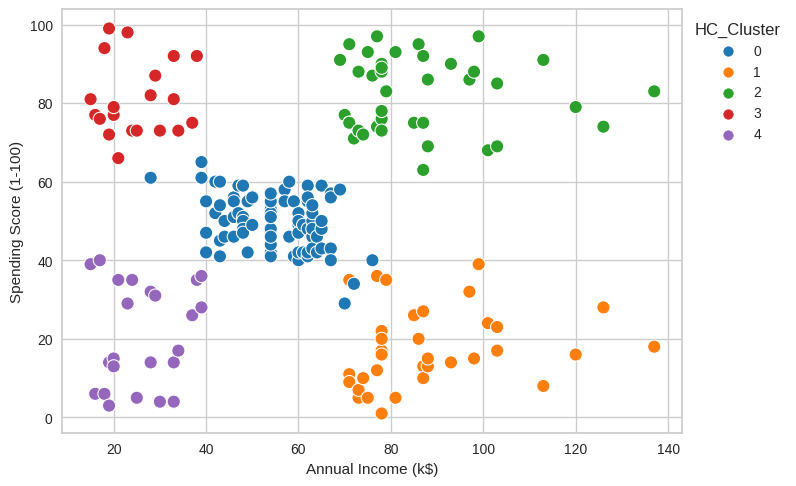

In [25]:
plt.figure()
ax=sns.scatterplot(data=df,x="Annual Income (k$)", y="Spending Score (1-100)",hue="HC_Cluster",palette="tab10",s=90)
sns.move_legend(ax, "upper left",bbox_to_anchor=(1, 1))
plt.show()

# DBSCAN

In [26]:
db = DBSCAN(eps=10,min_samples=6) #i valori di eps e min_sample sono scelti arbitrariamente
db.fit(X1)
tlabels = db.labels_
tlabels

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
        0, -1, -1, -1,  0, -1,  0, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1,  0, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2,
       -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,
        2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1, -1,
       -1,  2, -1,  2, -1,  2, -1, -1, -1,  2, -1,  2, -1,  2, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

Si ottengono un grande numero di Outliers (-1), bisogna modificare il valore di min-sample fino a quando si ottengono più Labels rispetto agli Outliers.

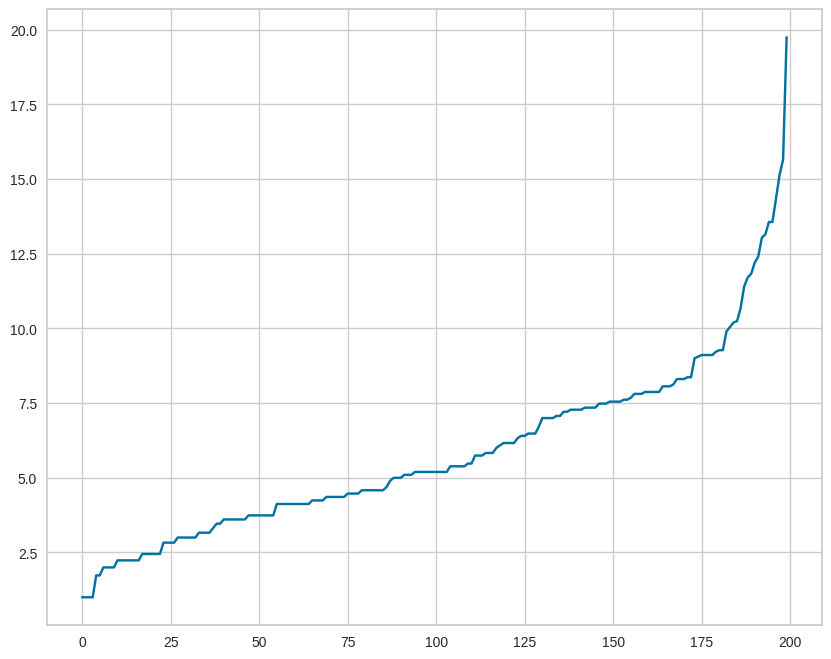

In [27]:
ep,count = NearestNeighbors(n_neighbors=20).fit(X1).kneighbors(X1) #il valore di n_neighbors è scelto arbitrariamente
ep = np.sort(ep, axis=0)
plt.figure(figsize=(10,8))
plt.plot(ep[:,1])
plt.show()

La curva aumenta gradualmente per valore epsilon (eps) pari a 9, coprendo più dell' 87% del dataset campione. Si esamineranno quindi i valori di epsilon (eps) fino a 13.

In [28]:
min_samples = range(2,10)
eps = np.arange(9,13, 0.25)
output = []
for ms in min_samples:
    for ep in eps:
        labels = DBSCAN(eps = ep,min_samples=ms).fit(X1).labels_
        score = metrics.silhouette_score(X1, labels)
        output.append((ms, ep, score))
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 0.2555628510249617
min_samples: 4
eps: 12.5


In [29]:
db = DBSCAN(eps=12.5,min_samples=4)
db.fit(X1)
labels = db.labels_
df["DB_Cluster"]=labels
labels

array([ 0,  0, -1,  0,  0,  0, -1, -1,  1,  0, -1, -1,  1,  0, -1,  0,  0,
        0,  0, -1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  2,  0,  2,  3,  2,  3,  2,  0,  2,  4,  2,
        3,  2,  4,  2,  3,  2,  0,  2,  4,  2,  0,  2,  3,  2,  3,  2,  3,
        2,  3,  2,  3,  2, -1,  2,  3,  2,  4,  2,  3,  2,  3,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,
       -1,  3,  2,  3, -1, -1,  2, -1, -1, -1, -1, -1, -1])

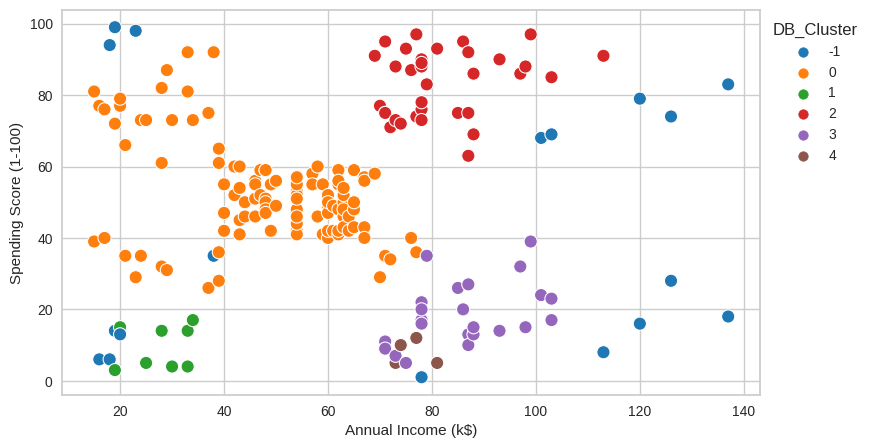

In [30]:
plt.figure(figsize=(9,5))
ax=sns.scatterplot(data=df,x="Annual Income (k$)", y="Spending Score (1-100)",hue="DB_Cluster",palette="tab10",s=90)
sns.move_legend(ax, "upper left",bbox_to_anchor=(1, 1))
plt.show()

I punti blu corrispondenti a -1 indicano degli Outliers.

# Mean Shift

In [31]:
estimate_bandwidth(X1, quantile=0.1)

22.173844534734847

In [32]:
mean_shift = MeanShift(bandwidth=22.173844534734847)
mean_shift.fit(X1)

MeanShift(bandwidth=22.173844534734847)

In [33]:
yhat_ms = mean_shift.predict(X1)
clusters_ms = unique(yhat_ms)
print("Clusters of Mean Shift:", clusters_ms)

Clusters of Mean Shift: [0 1 2 3 4]


In [34]:
labels_ms =mean_shift.labels_
df["MS_Cluster"]=labels_ms
centroids_ms = mean_shift.cluster_centers_

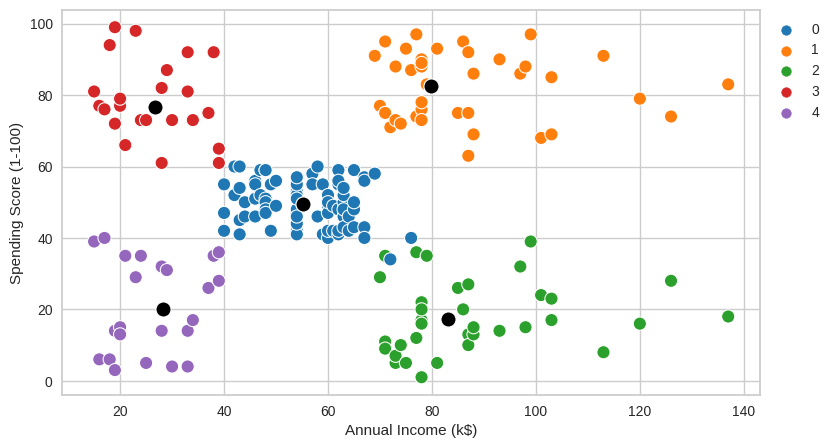

In [35]:
plt.figure(figsize=(9,5))
ax=sns.scatterplot(data=df,x="Annual Income (k$)", y="Spending Score (1-100)",hue="MS_Cluster",palette="tab10",s=90)
ax=sns.scatterplot(x=centroids_ms[:,1],y=centroids_ms[:,2],s=120,color="black")
sns.move_legend(ax, "upper left",bbox_to_anchor=(1, 1))
plt.show()

### CLUSTER VALIDATION
Verifico quanto sia efficace un algoritmo di Clustering treamite due criteri:

SILHOUETTE: Il valore della Silhouette misura quanto un membro di un cluster sia vicino al proprio cluster di appartenenza rispetto agli altri cluster. Il valore della silhouette varia da -1 a 1, in cui 1 è il miglior risultato e -1 il peggiore.

DAVIES-BOULDIN SCORE: Si tratta dui una proporzione tra la distanza interna di un cluster e la distanza tra i cluster. Lo score migliore è 0.

In [36]:
silhoutte_scores=[metrics.silhouette_score(X1,K_means.labels_),metrics.silhouette_score(X1,agc.labels_),
                  metrics.silhouette_score(X1,db.labels_),metrics.silhouette_score(X1,mean_shift.labels_)]

davies_bouldin_scores=[metrics.davies_bouldin_score(X1,K_means.labels_),metrics.davies_bouldin_score(X1,agc.labels_),
                  metrics.davies_bouldin_score(X1,db.labels_),metrics.davies_bouldin_score(X1,mean_shift.labels_)]

In [37]:
score_df={"Algoritmo":["K-Means", "Gerarchico", "DBSCAN", "Mean-Shift"],"Silhouette":silhoutte_scores,
          "Davies-Bouldin Scores":davies_bouldin_scores}
score_df=pd.DataFrame.from_dict(score_df)
score_df

,Algoritmo,Silhouette,Davies-Bouldin Scores
0,K-Means,0.444286,0.821878
1,Gerarchico,0.440189,0.821672
2,DBSCAN,0.255563,2.236800
3,Mean-Shift,0.443280,0.824391


### Conclusione
L'analisi appena effettuata evidenzia come KMeans e Mean-Shift siano pressochè analoghe. Si predilige il metodo KMeans perchè restituisce un valore delle Silhouette più alto. Perciò il metodo preferibile da applicare nella classificazione dei clienti del centro commerciale è quello KMeans.

